In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [135]:
df = pd.read_csv('Dataset/mcdonalds.csv')

### Step 4: Exploring Data
First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data and some basic visualizations:

In [130]:
df.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [131]:
df.shape

(1453, 15)

In [132]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


### Visualizations for segmentation

Count Plot for: yummy vs non yummy

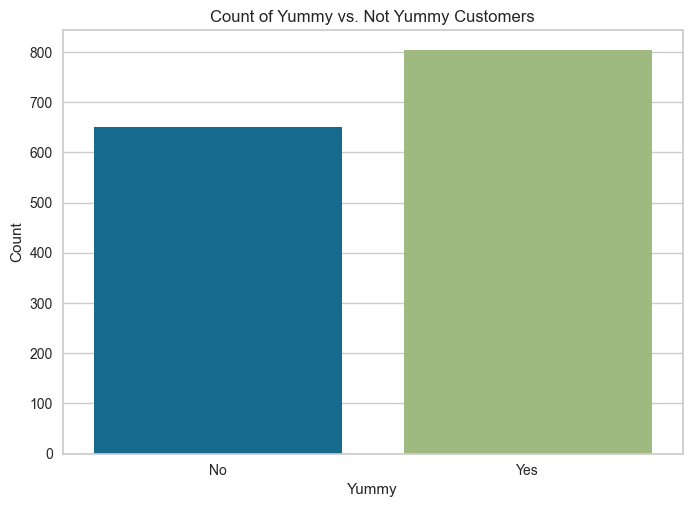

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='yummy')
plt.xlabel('Yummy')
plt.ylabel('Count')
plt.title('Count of Yummy vs. Not Yummy Customers')
plt.show()

Age Distribution of the customers

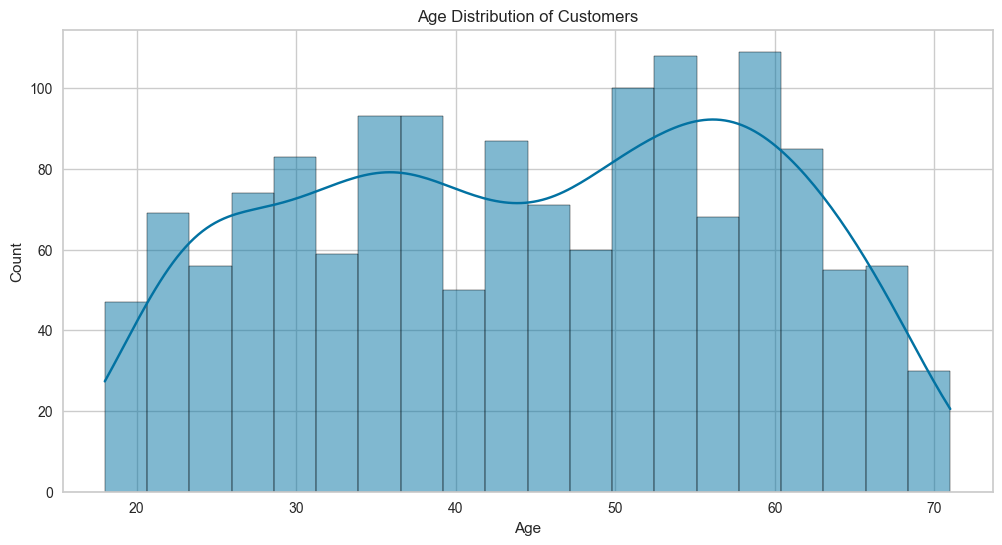

In [121]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()

Age wise distribution of Yummy and not yummy

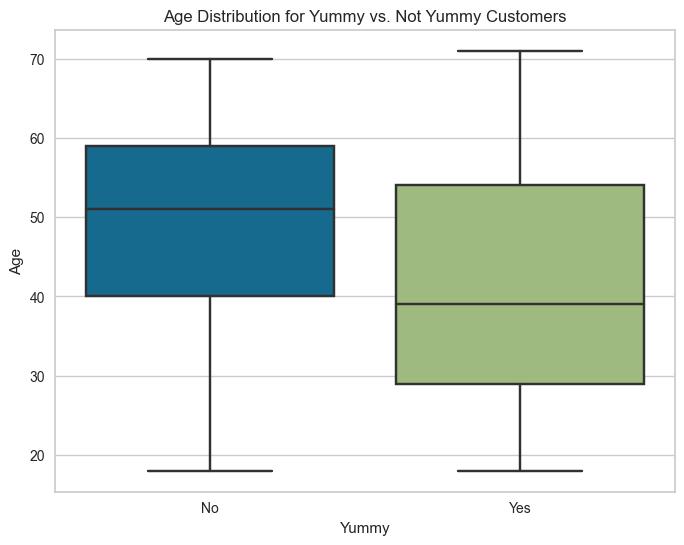

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='yummy', y='Age')
plt.xlabel('Yummy')
plt.ylabel('Age')
plt.title('Age Distribution for Yummy vs. Not Yummy Customers')
plt.show()

C:\Users\sjasm\AppData\Local\Temp\ipykernel_19112\2436750176.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['yummy'] == 'Yes']['Age'], label='Yummy', shade=True, color='blue')
C:\Users\sjasm\AppData\Local\Temp\ipykernel_19112\2436750176.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['yummy'] == 'No']['Age'], label='Not Yummy', shade=True, color='red')


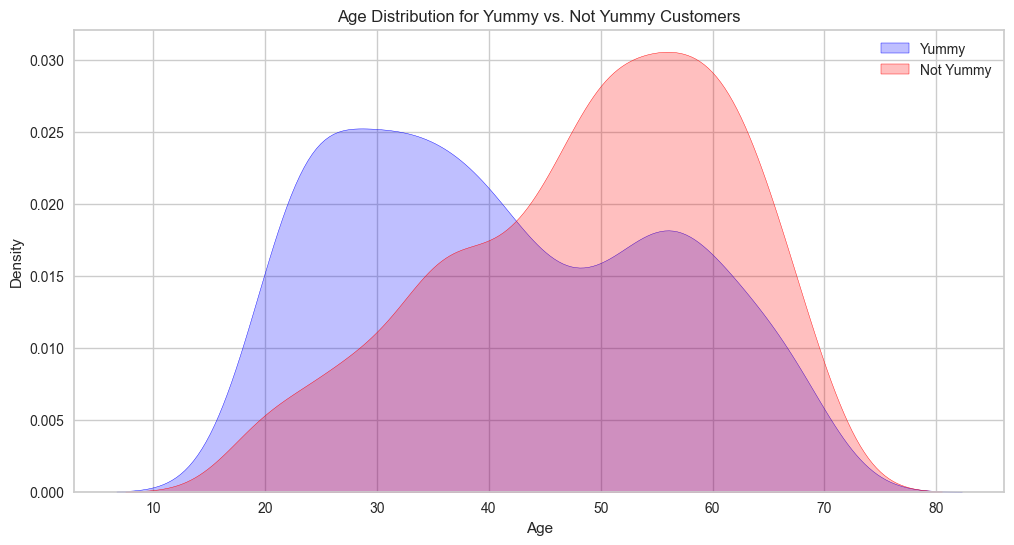

In [120]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['yummy'] == 'Yes']['Age'], label='Yummy', shade=True, color='blue')
sns.kdeplot(data=df[df['yummy'] == 'No']['Age'], label='Not Yummy', shade=True, color='red')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution for Yummy vs. Not Yummy Customers')
plt.legend()
plt.grid(True)
plt.show()

#### Gender Distribution

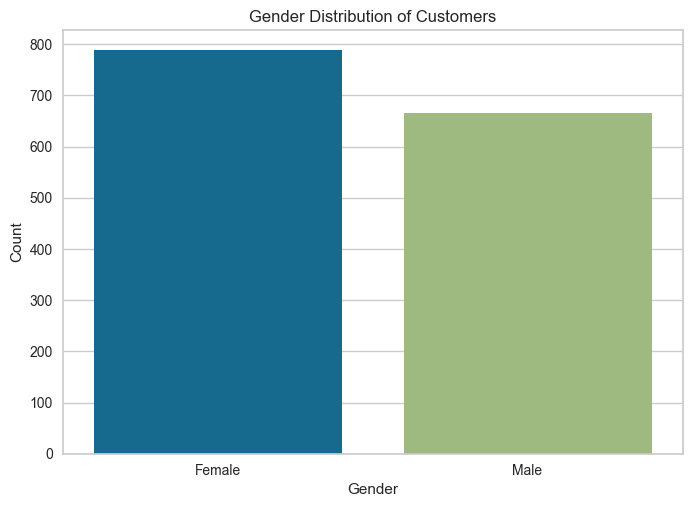

In [101]:
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Customers')
plt.show()

<Figure size 800x600 with 0 Axes>

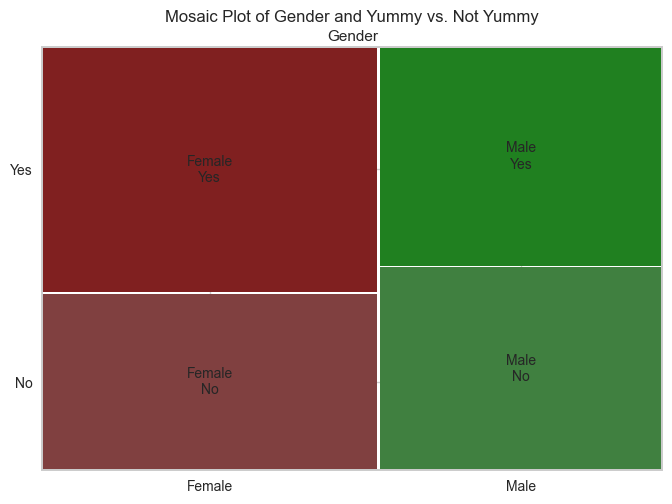

In [126]:
import statsmodels.graphics.mosaicplot as mosaic

# mosaic plot for the relationship between gender and yummy/not yummy
plt.figure(figsize=(8, 6))
mosaic.mosaic(df, ['Gender', 'yummy'])
plt.xlabel('Gender')
plt.ylabel('Yummy vs. Not Yummy')
plt.title('Mosaic Plot of Gender and Yummy vs. Not Yummy')
plt.show()


#### Visit Frequency

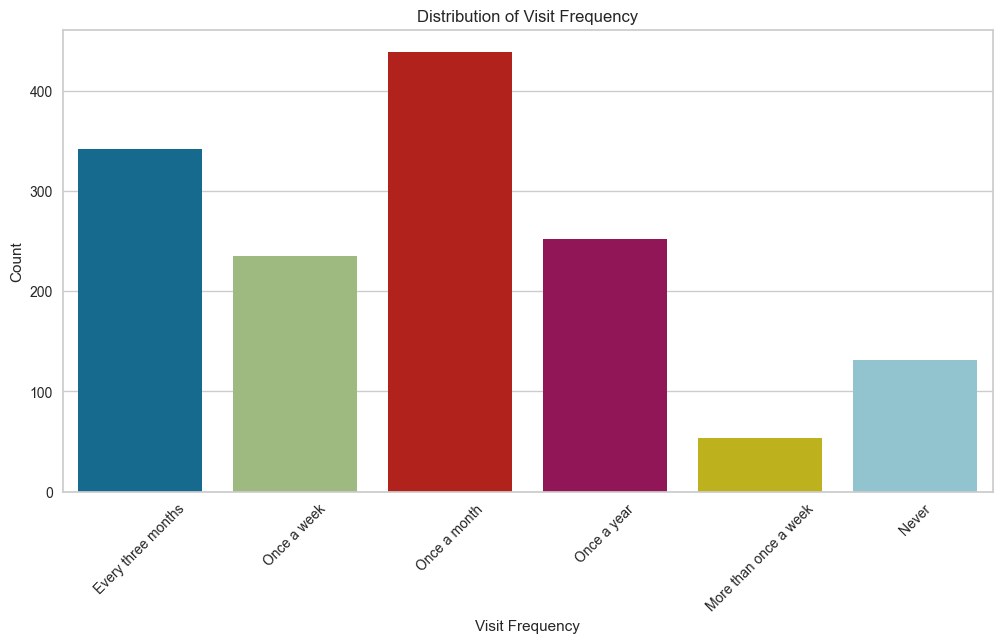

In [119]:
##visit frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='VisitFrequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.title('Distribution of Visit Frequency')
plt.xticks(rotation=45)
plt.show()

#### Visti Frequency distribution for different Genders

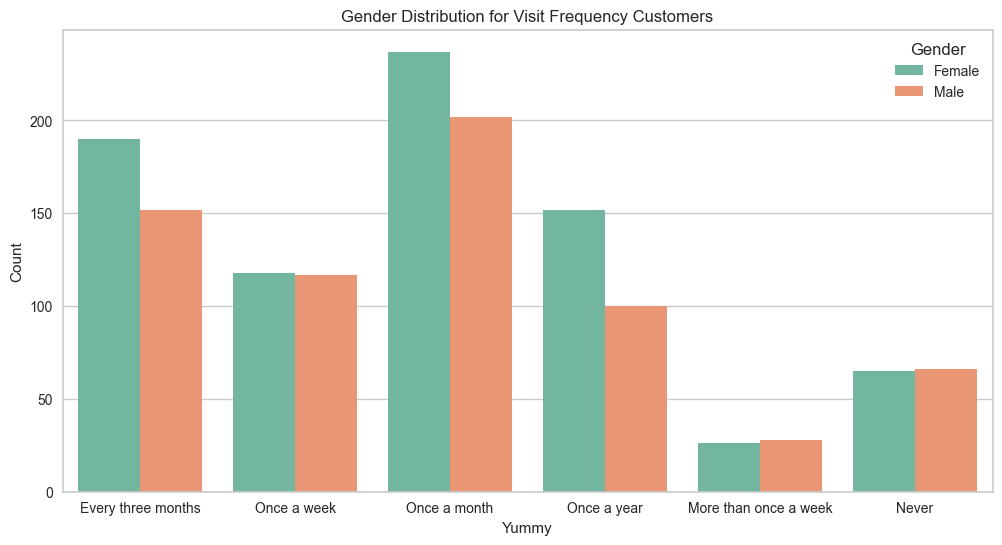

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='VisitFrequency', hue='Gender', palette='Set2')
plt.xlabel('Yummy')
plt.ylabel('Count')
plt.title('Gender Distribution for Visit Frequency Customers')
plt.legend(title='Gender', loc='upper right')
plt.show()

Observation: Males have a higer Visit frequency when compared to females and a lot people prefer to visit Once a month

#### Visit frequency of different age groups:

In [115]:
##creating age bins
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

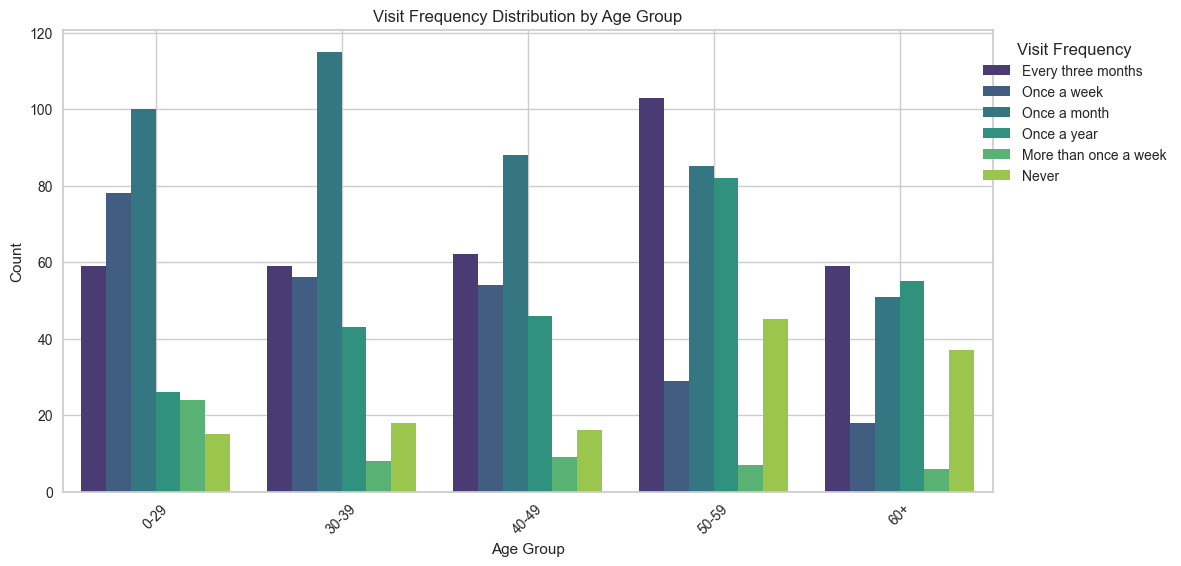

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='VisitFrequency', palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Visit Frequency Distribution by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Visit Frequency', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

Observation: Visit frequency of 0-29 and 30-39 age group is greater when compared to 50 plus.

### Analyzing Dataset using PCA for market segmentation

In [123]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,AgeGroup
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,60+
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,50-59
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,60+


Observation: 
* This quick glance at the data shows that the segmentation variables (perception of McDonald’s) are verbal, not numeric. This means that they are coded using the words YES and NO. This is not a suitable format for segment extraction.

In [22]:
df_yes_no = df.iloc[:, 0:11].values 

In [23]:
# Convert "Yes" to 1 and other values to 0
df_yes_no = (df_yes_no == "Yes").astype(int)

In [24]:
df_yes_no

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [25]:
#calculates the column means of the modified matrix
# Calculate column means and round to 2 decimal places
column_means = np.mean(df_yes_no, axis=0)
rounded_column_means = np.round(column_means, 2)

col_name = df.iloc[:,:11].columns.values

col_mean_df = pd.DataFrame({'Column Name': col_name, 'Rounded Mean': rounded_column_means})

col_mean_df

,Column Name,Rounded Mean
0,yummy,0.55
1,convenient,0.91
2,spicy,0.09
3,fattening,0.87
4,greasy,0.53
5,fast,0.90
6,cheap,0.60
7,tasty,0.64
8,expensive,0.36
9,healthy,0.20


Another way of exploring data initially is to compute a principal components
analysis, and create a perceptual map. A perceptual map offers initial insights into
how attributes are rated by respondents and, importantly, which attributes tend to be
rated in the same way.

In [26]:
from sklearn.decomposition import PCA

pca = PCA()  # Create a PCA object
pca.fit(df_yes_no)  # Fit the PCA model to the data

# Print summary statistics
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Eigenvectors):\n", pca.components_)
print("Singular Values (Square Roots of Eigenvalues):", np.sqrt(pca.explained_variance_))

Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Principal Components (Eigenvectors):
 [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.2

In [27]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["Principal Component"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df.columns.values[0:11]
loadings_df = loadings_df.set_index('feature')
loadings_df

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,Principal Component1,Principal Component2,Principal Component3,Principal Component4,Principal Component5,Principal Component6,Principal Component7,Principal Component8,Principal Component9,Principal Component10,Principal Component11
feature,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


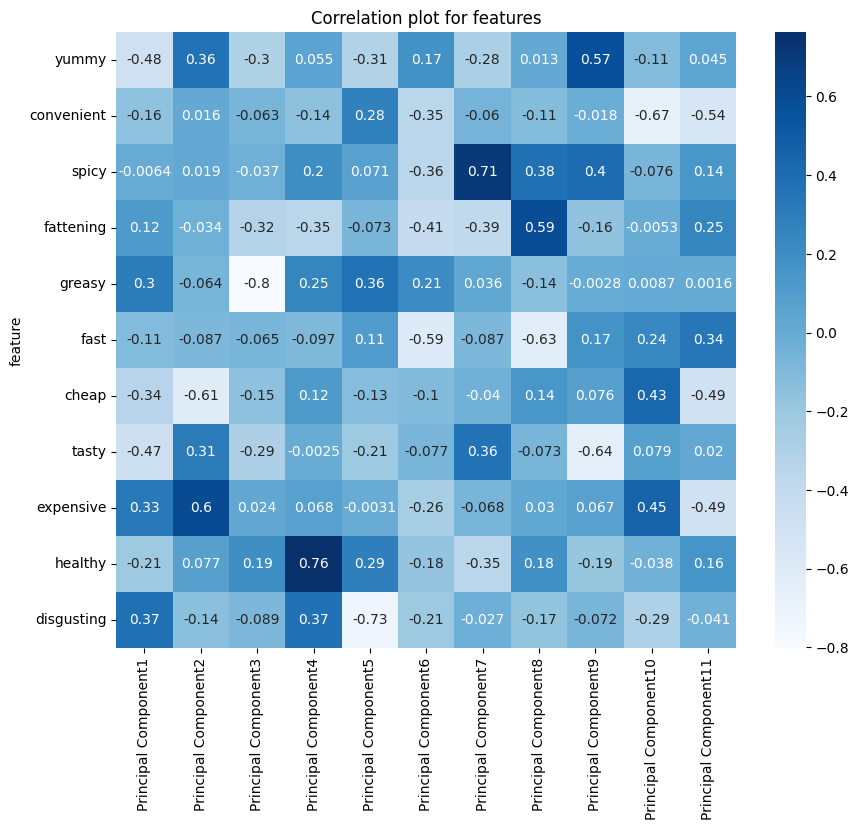

In [28]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.title('Correlation plot for features')
plt.show()

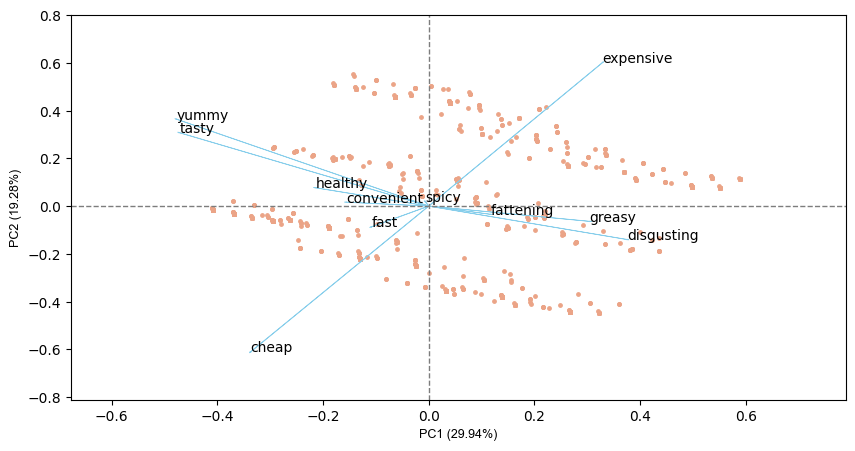

In [29]:
# getting scores
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(df_yes_no)

# 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

Observations: 
* Perceptual map shows the resulting perceptual map. The attributes CHEAP and EXPENSIVE play a key role in the evaluation of McDonald’s, and these two attributes are assessed quite independently of the others.

* The remaining attributes align with what can be interpreted as positive versus negative perceptions: FATTENING,
DISGUSTING and GREASY (negative) point in the same direction in the perceptual chart, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY.

* In the opposite direction are the positive attributes FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY

In [30]:
std_devs = np.sqrt(pca.explained_variance_)
print(f"Standar Deviations: {std_devs}")

Standar Deviations: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


Observation:
* Eigen Values indicate that first two components capture about 50% of the information contained in the segmentation variables.

### Step 5:  Extracting Segments 

#### *Using k-Means*
Step 5 is where we extract segments. To illustrate a range of extraction techniques, we subdivide this step into three sections. In the first section, we will use standard k-means analysis.

In [31]:
##imports
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [32]:
# Setting a random seed for reproducibility
np.random.seed(1234)

In [33]:
#params
cluster_range = range(2, 9)  #cluster range for kmeans
db_score = []


In [34]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df_yes_no)

    db_sc = davies_bouldin_score(df_yes_no, kmeans.labels_)
    db_score.append(db_sc)
    

In [35]:
print(db_score)

[1.7582095384314005, 1.595289454187358, 1.5622783470479171, 1.5575078281353298, 1.4745314258724003, 1.4451152750738852, 1.4902645292776309]


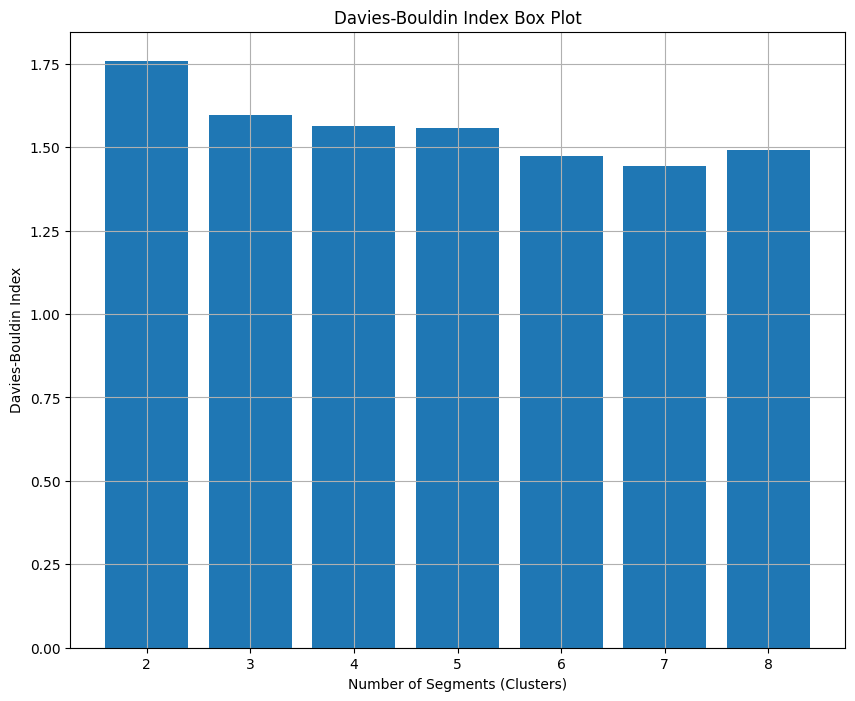

In [36]:
plt.bar(cluster_range, db_score)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Box Plot')
plt.grid(True)
plt.show()

Observation:
* The sum of distances within
market segments drops slowly as the number of market segments increases. 
* We
expect the values to decrease because more market segments automatically mean
that the segments are smaller and, as a consequence, that segment members are more
similar to one another

In [79]:
#params for further analysis
cluster_range = range(2, 9)

# Number of bootstrap replicates
n_boot_replicates = 100

# Number of resamples for each bootstrap replicate
n_resamples = 10

# Initializing a list to store adjusted Rand index scores for each bootstrap replicate
ari_scores = []

In [80]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

for _ in range(n_boot_replicates):
    # Bootstrap resampling of the data
    bootstrap_sample = resample(df_yes_no, n_samples=n_resamples, random_state=1234)
    
    ari_scores_bootstrap = []
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        
        true_labels = np.random.choice(range(k), size=n_resamples)
        ari = adjusted_rand_score(true_labels, kmeans.labels_)
        ari_scores_bootstrap.append(ari)
    
    ari_scores.append(ari_scores_bootstrap)

In [85]:
ari_array = np.array(ari_scores)
print(ari_array.shape)

(100, 7)


In [86]:
ari_reshape = ari_array.reshape(7, 100)

In [87]:
ari_reshape[0]

array([-0.10619469,  0.13461538,  0.03076923, -0.01123596, -0.1958042 ,
       -0.09756098, -0.07142857,  0.60176991,  0.01394422,  0.08412483,
       -0.2       , -0.04651163,  0.14634146, -0.06299213, -0.10619469,
       -0.03686636, -0.03799186,  0.19161677, -0.15841584, -0.08247423,
       -0.07427056, -0.07142857,  0.13461538, -0.06418919,  0.3852459 ,
       -0.0173913 , -0.09756098, -0.06779661,  0.07079646, -0.07913669,
       -0.17493473, -0.17977528,  0.13913043, -0.09756098, -0.07427056,
       -0.07142857, -0.03686636, -0.01694915,  0.03846154, -0.18032787,
       -0.10738255,  0.47674419, -0.10619469,  0.13669065, -0.06418919,
       -0.01123596, -0.05882353, -0.10738255, -0.07655502, -0.07142857,
       -0.03686636,  0.20289855,  0.03846154,  0.04255319, -0.09090909,
       -0.07427056, -0.07142857, -0.09756098, -0.21621622, -0.19047619,
        0.1       , -0.09756098, -0.08      ,  0.05970149,  0.06682028,
       -0.01694915, -0.12781955, -0.15841584, -0.09090909, -0.05

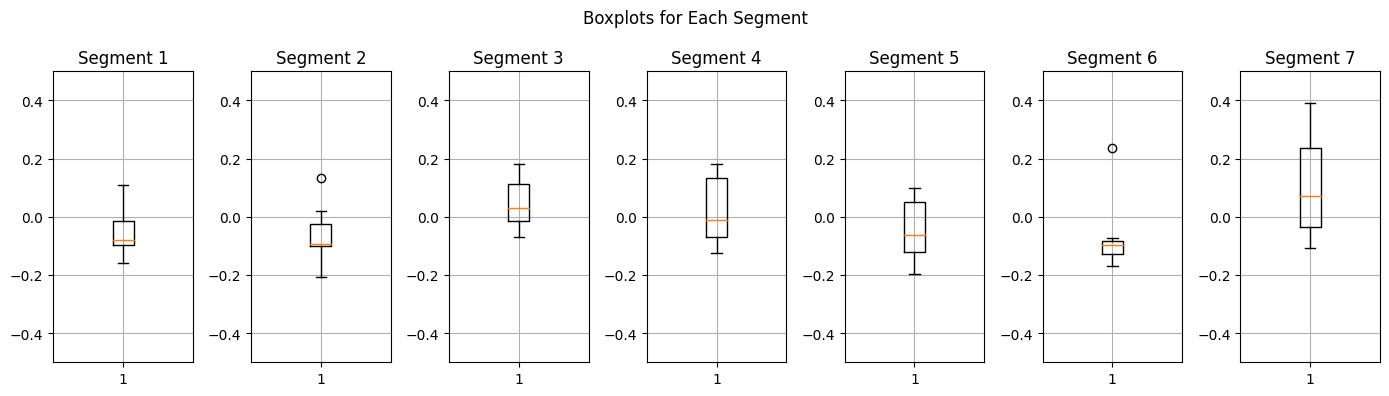

In [88]:
fig, axs = plt.subplots(1, 7, figsize=(14, 4))

y_range = (-0.5, 0.5)

for i in range(7):
    axs[i].boxplot(ari_reshape[:, i])
    axs[i].set_title(f'Segment {i + 1}')
    axs[i].set_ylim(y_range)  # Set the y-axis range
    axs[i].grid(True)

fig.suptitle('Boxplots for Each Segment')

plt.tight_layout()

plt.show()


### Applying Elbow method to get number of clusters for Kmeans (Pythonic way)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

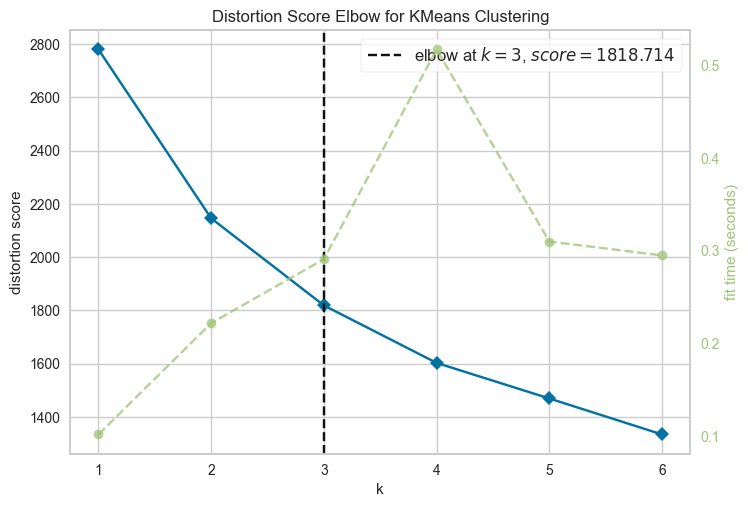

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,7)).fit(df_yes_no)
visualizer.show()

Observation:
* 3 segments for kmeans according to the dataset